# Chapter-1: Visualising Cost Function

In this notebook, we'll see how to visualise a cost function for a simple univariant regression model.

## First lets read the data from the file and represent it 

To do that , we follow the following steps:
- Read the data using pandas and create a dataframe
- display the dataframe
- create a scatter plot of the dataframe using matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3d plots

In [6]:
trainingData = pd.read_csv('sampleHouseData.csv')
trainingData.head(10)

,Unnamed: 0,size,price
0,0,2590,795
1,1,2240,915
2,2,2040,950
3,3,3800,1950
4,4,1042,950
5,5,1190,740
6,6,670,460
7,8,1520,565
8,9,2340,699
9,10,1320,899


In [8]:
# Size of training Dataset
m = trainingData['size'].size
m

85

In [10]:
sizeList = np.array(trainingData['size'])
sizeList

array([2590, 2240, 2040, 3800, 1042, 1190,  670, 1520, 2340, 1320, 1800,
       2490, 2650, 2560,  900, 1360,  550, 2974, 1989, 1332, 2668,  770,
       1280, 3200,  889,  508, 3140, 2000,  792, 1690, 3000, 1550,  871,
       1940,  474, 1770, 2510,  750,  573, 1500, 2920, 2817,  617, 1280,
       1523, 1240, 2280, 3590, 2478, 2360,  720, 2480, 1550,  780, 2820,
       2900, 1092, 1731, 1500, 1344, 2320, 2820, 1070, 1113, 2100, 2620,
       1270, 2702, 2031, 2350, 2640, 1340, 1365,  635, 1800,  870, 1510,
       1120, 2580,  875, 2220,  607, 1496, 2670, 1810], dtype=int64)

In [12]:
priceList = np.array(trainingData['price'])
priceList

array([ 795,  915,  950, 1950,  950,  740,  460,  565,  699,  899, 1050,
        936, 1511, 1330,  550,  700,  330, 1750,  980,  845, 1213,  530,
        625, 1275,  680,  325, 1219,  907,  517,  760, 1484,  950,  430,
        520,  335,  805, 1000,  375,  390, 1070,  948,  912,  480,  776,
       1395,  750, 1065, 2350, 1580, 1775,  600,  800, 1100,  750,  865,
       1450,  829,  575,  860,  770,  560,  900,  575,  595,  950, 1300,
        727, 1605, 1480,  888, 1850,  615,  525,  510,  549,  555,  660,
        615, 1635,  420, 1650,  427,  910, 1023,  682], dtype=int64)

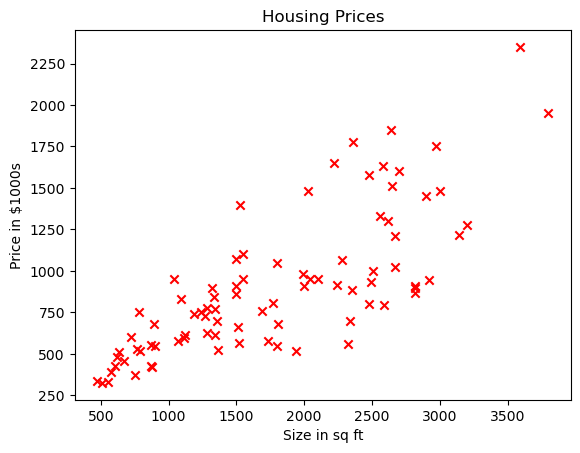

In [14]:
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.show()

## Next step is to define the model function:

We are gonna use univariant linear regression, the function for this model is given by <br/>
`F w,b (x) = w*x + b`<br/>
The parameters/weights of the model are w,b<br/>
<br/>
we will use the squared error cost function to find the optimal value of w,b<br/>
The squared error cost function is given by:<br/>
`J (w,b) = (1/2m) {i in range 1 to m}∑ ( F w,b (x^(i)) - y^(i) )`<br/>
or <br/>
`J (w,b) = (1/2m) {i in range 1 to m}∑ ( w*x^(i) + b - y^(i) )`

### First lets simplify things to understand how it works:
To simplify things lets consider `b=0` for the model, and work with only w (so that we can visualise in 2D first)<br/>
Let's consider various values of w and see how the plot comes out<br/>
We will make 2 plots, one is the plot of line on the dataset for various w values, second is the cost function value for each value of w
Lets consider the value of w in range 0 to 1 , for first plot lets consider 10 values 0.1, 0.2, 0.3... 1.0<br/>
for second plot of cost function lets consider 100 values: 0.01,0.02...0.99,1.00

In [16]:
#Model function f
def f(w,x):
    return w*x

def f_list(w):
    return np.array([x*w for x in sizeList])

#Cost Function J
def J(w):
    esq = 0
    for i in range(0,m):
        esq += ( w*sizeList[i] - priceList[i] )**2
    res = (1/(2*m)) * esq
    return res

#### First Plot F w (x) :

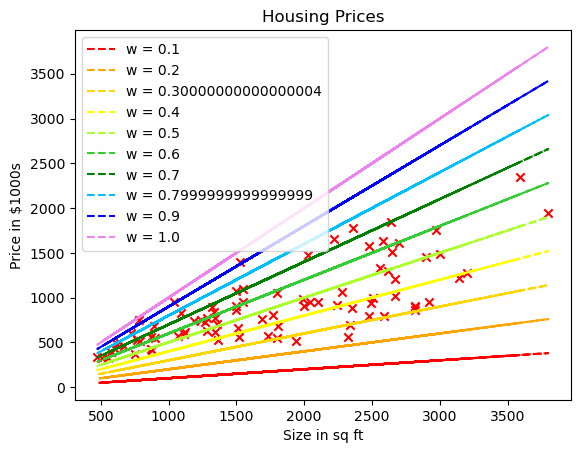

In [18]:
colors = ['red','orange','gold','yellow','greenyellow','limegreen','green','deepskyblue','blue','violet']
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
for i in range(0,10):
    w = i/10 + 0.1
    ylist = f_list(w)
    plt.plot(sizeList, ylist, label=f"w = {w}", color = colors[i], linestyle="--")
plt.legend()
plt.show()
    
    

#### Second Plot J(w):

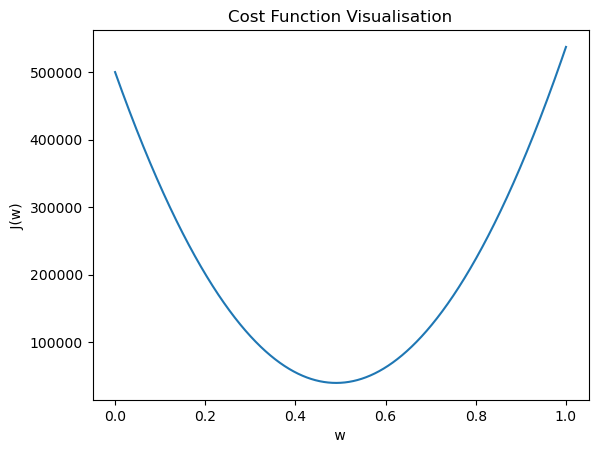

Optimal Value of w is :  0.4903


In [20]:
J_list = []
w_list = []
opt = float('inf')
res = 0
for i in range(1,10001):
    w = i/10000
    tj = J(w)
    w_list.append(w)
    J_list.append(tj)
    if tj<opt:
        opt = tj
        res = w

plt.plot(w_list, J_list)
plt.title("Cost Function Visualisation")
plt.xlabel(" w ")
plt.ylabel(" J(w) ")
plt.show()
print("Optimal Value of w is : ",res)
w_opt = res

#### Now lets use the optimal value of m to make some predictions

# Optimal linear regression function plot:
opt_f_list = np.array([x*w_opt for x in sizeList])
colors = ['red','orange','gold','yellow','greenyellow','limegreen','green','deepskyblue','blue','violet']
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
plt.show()

Take user input and make prediction:

Enter Size of House in Sq Ft:  1365


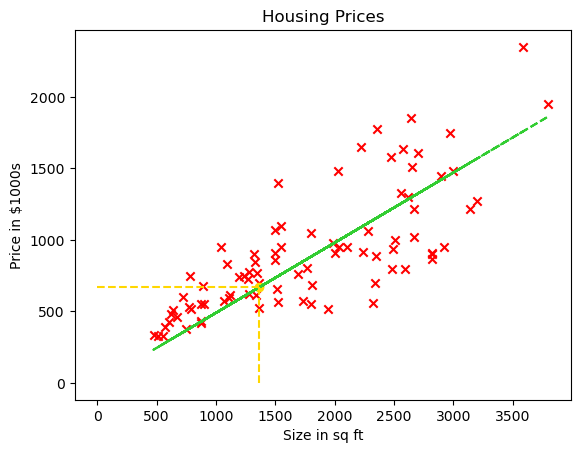

Optimal Price is :  669.2595


In [22]:
inp_size = int(input("Enter Size of House in Sq Ft: "))
inp_size = [inp_size]
opt_f_list = np.array([x*w_opt for x in sizeList])
colors = ['red','orange','gold','yellow','greenyellow','limegreen','green','deepskyblue','blue','violet']
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
op_price = [inp_size[0]*w_opt]
plt.vlines(inp_size,0,op_price, linestyle="--", color="gold")
plt.hlines(op_price,0,inp_size, linestyle="--", color="gold")
plt.scatter(inp_size, op_price, color="gold", marker = "o")
plt.show()
print("Optimal Price is : ", op_price[0])

## Now that we understand everything, lets bring back b and see the whole picture

First lets visualise how different value of w and b looks like on the plot

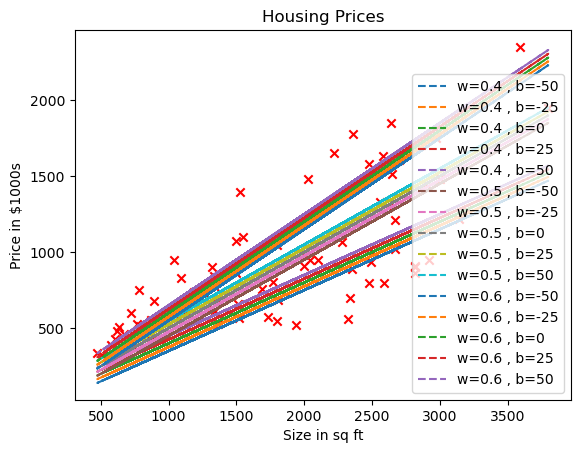

In [24]:
def f(w,b,x):
    return w*x + b

plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')

for i in range(4,7):
    w = i/10
    for j in range(-50,51,25):
        b = j
        ylist = [f(w,b,x) for x in sizeList]
        plt.plot(sizeList, ylist,linestyle="--", label=f"w={w} , b={b}")
plt.legend()
plt.show()
        

Now lets plot the Cost function plot:

In [26]:
w_list = np.array([x/1000 for x in range(200,800)])
b_list = np.array([x for x in range(0,500,10)])

def J(w,b):
    tsum = 0
    for i in range(0,m):
        tsum += ( w*sizeList[i] + b - priceList[i] )**2
    return (1/(2*m)) * tsum

J_vals = np.array([[J(w, b) for w in w_list] for b in b_list])
print(J_vals)

[[200958.12117647 199846.67199312 198739.05769012 ... 219671.18278512
  220849.15717247 222030.96644018]
 [195488.89764706 194395.23528724 193305.40780776 ... 224820.69290276
  226016.45411365 227216.05020488]
 [190119.67411765 189043.79858135 187971.75792541 ... 230070.20302041
  231283.75105482 232501.13396959]
 ...
 [ 52004.61529412  51729.14681665  51457.51321953 ... 569798.15831453
  571812.11340776 573829.90338135]
 [ 51235.39176471  50977.71011076  50723.86333718 ... 579647.66843218
  581679.41034894 583714.98714606]
 [ 50566.16823529  50326.27340488  50090.21345482 ... 589597.17854982
  591646.70729012 593700.07091076]]


In [28]:
W, B = np.meshgrid(w_list, b_list)
print(W)
print("________________")
print(B)

[[0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 ...
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]
 [0.2   0.201 0.202 ... 0.797 0.798 0.799]]
________________
[[  0   0   0 ...   0   0   0]
 [ 10  10  10 ...  10  10  10]
 [ 20  20  20 ...  20  20  20]
 ...
 [470 470 470 ... 470 470 470]
 [480 480 480 ... 480 480 480]
 [490 490 490 ... 490 490 490]]


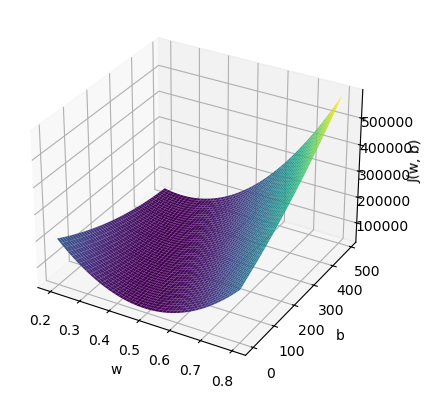

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
plt.show()

A 2D projection of this 3D map (contour map):

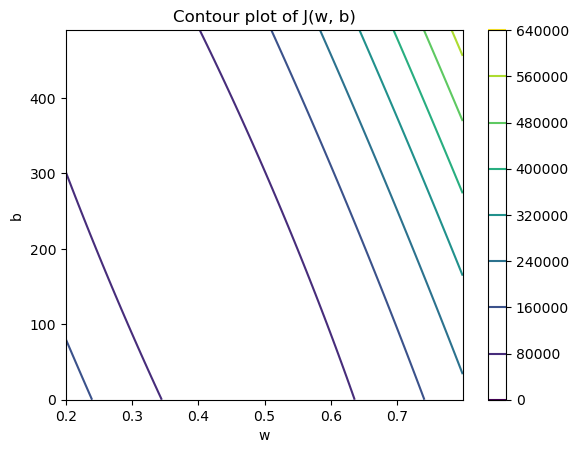

In [32]:
plt.contour(W, B, J_vals)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of J(w, b)')
plt.colorbar()
plt.show()

As we can see the value of w matters much more than value of b, which means we can't get a good sence of optimal solution of b,
this is because the sensitivity or accuracy or contour map is acc to the max value of J which increases exponentially <br/>
What we need is a way to have more accuracy or sensitivity for lower values and low accuracy/sensitivity for higher values, this can be achieved by using a logorithmic scaling, which negates the exponential growth of value, by increasing the base of log we increase the sensitivity for lower values <br/>

log base a (b) = log base c (b) / log base c (a)

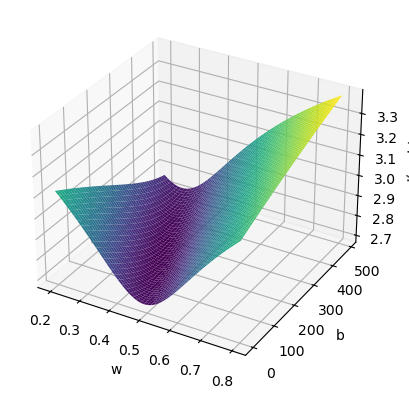

In [60]:
logJ = np.log(J_vals)/np.log(50)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, logJ, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
plt.show()

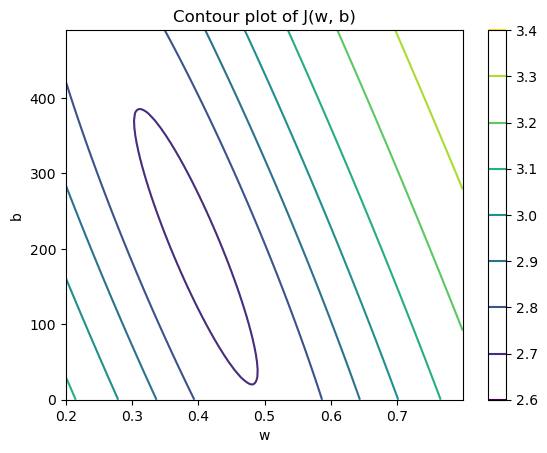

In [58]:
logJ = np.log(J_vals)/np.log(50)
plt.contour(W, B, logJ)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of J(w, b)')
plt.colorbar()
plt.show()

From the above contor plot we can get a sence of the optimal values for w and b, which is around 4.5 and 200, although the correct way to get the optimal values of w and b is to use an algorithm such as gradient decent, we'll see that in the future chapter. <br/>
For now, lets plot a line with w=0.43 and b = 180 and see if it looks like a good fit.

Enter Size of House in Sq Ft:  1365


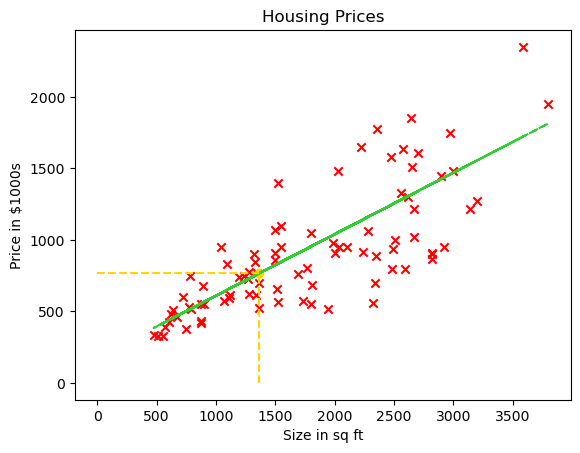

Optimal Price is :  766.95


In [248]:
inp_size = int(input("Enter Size of House in Sq Ft: "))
inp_size = [inp_size]
opt_f_list = np.array([x*0.43 + 180 for x in sizeList]) # w=0.45 b=190
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
op_price = [inp_size[0]*0.43 + 180]
plt.vlines(inp_size,0,op_price, linestyle="--", color="gold")
plt.hlines(op_price,0,inp_size, linestyle="--", color="gold")
plt.scatter(inp_size, op_price, color="gold", marker = "o")
plt.show()
print("Optimal Price is : ", op_price[0])

# Chapter-2: Gradient Descent Algorithm
So far, we have seen what are cost functions and how to visualise them, now we'll see how to find the optimal parameters for the cost function using a standard algorithm known as Gradient Descent.

## First lets consider the simpler example where we consider b=0
1) choose a starting value of w (w=0)
2) `w_temp = w - α ∂/∂w J(w)`
3) return w if `J(w) =< J(w_temp)` else w = w_temp then go to 2

In [188]:
# Function to compute ∂/∂w J(w)

"""
By solving the partial differencial equation (refer notes) we get the solution:
∂/∂w J(w) = (1/m) * {i=range(1,m)}∑(w*x(i) - y(i) ) x(i)
"""

#modal function f
def F(w,x):
    return w*x

#Cost Function J
def J(w):
    esq = 0
    for i in range(0,m):
        esq += ( w*sizeList[i] - priceList[i] )**2
    res = (1/(2*m)) * esq
    return res

# Gradient function ∂/∂w J(w)
def ddw_J(w):
    ts = 0
    for i in range(0,m):
        ts += (w*sizeList[i] - priceList[i])*sizeList[i]
    res = (1/m) * ts
    return res

#### Gradient descent on cost function:

Optimal value of w is :  0.4903262979847469


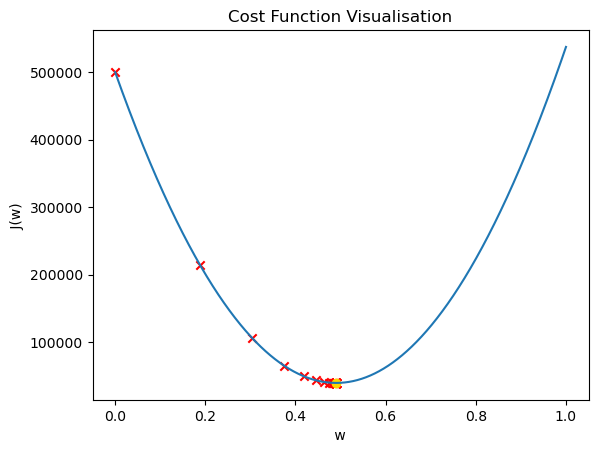

In [194]:
J_list = []
w_list = []
opt = float('inf')
res = 0
for i in range(1,10001):
    w = i/10000
    tj = J(w)
    w_list.append(w)
    J_list.append(tj)
    if tj<opt:
        opt = tj
        res = w

plt.plot(w_list, J_list)
plt.title("Cost Function Visualisation")
plt.xlabel(" w ")
plt.ylabel(" J(w) ")

# Gradient descent part:
nw_list = []
nw = 0 #new w
alpha = 0.0000001 # I made a mistake here by putting alpha value 0.001 which was too large, be sure to have correct alpha value
while(True):
    nw_list.append(nw)
    w_temp = nw - alpha * ddw_J(nw)
    if J(w_temp) >= J(nw):
        break
    nw = w_temp

JW_list = [J(x) for x in nw_list]

plt.scatter(nw_list, JW_list, c='r', marker='x')
plt.scatter(nw, J(nw), c='gold', marker='o')
print("Optimal value of w is : ", nw)
plt.show()

#### Now that we have found the optimal value of w using gradient descent, lets test it

Enter Size of House in Sq Ft:  1365


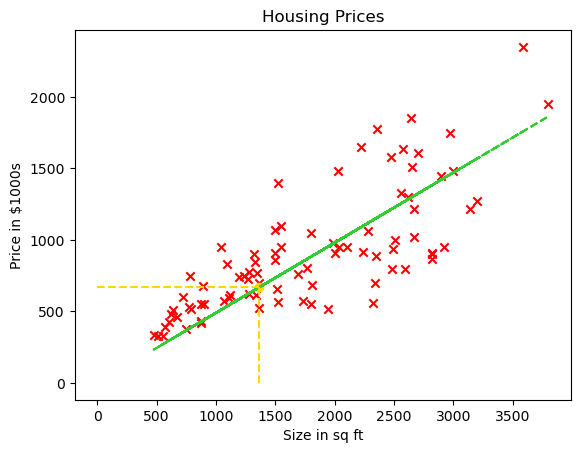

Optimal Price is :  669.2953967491795


In [144]:
inp_size = int(input("Enter Size of House in Sq Ft: "))
inp_size = [inp_size]
opt_f_list = np.array([x*nw for x in sizeList])
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
op_price = [inp_size[0]*nw]
plt.vlines(inp_size,0,op_price, linestyle="--", color="gold")
plt.hlines(op_price,0,inp_size, linestyle="--", color="gold")
plt.scatter(inp_size, op_price, color="gold", marker = "o")
plt.show()
print("Optimal Price is : ", op_price[0])

## Now lets consider the complete example with w and b both
1) choose a starting value of w (w=0, b=0)
2) `w_temp = w - α ∂/∂w J(w,b)`
3) `b_temp = b - α ∂/∂b J(w,b)`
4) if `J(w_temp) >= J(w)` and `J(b_temp) >= J(b)` then return w and b then exit
5) if not `J(w_temp) >= J(w)` then `w = w_temp`
6) if not `J(b_temp) >= J(b)` then `b = b_temp`
7) go to 2

In [207]:
# Function to compute ∂/∂w J(w,b) and ∂/∂b J(w,b)

"""
By solving the partial differencial equation (refer notes) we get the solution:
∂/∂w J(w) = (1/m) * {i=range(1,m)}∑(w*x(i) - y(i) ) x(i)
"""

#modal function f
def F(w,x,b):
    return w*x + b

#Cost Function J
def J(w,b):
    esq = 0
    for i in range(0,m):
        esq += ( w*sizeList[i] + b - priceList[i] )**2
    res = (1/(2*m)) * esq
    return res

# Gradient function ∂/∂w J(w,b)
def ddw_J(w,b):
    ts = 0
    for i in range(0,m):
        ts += (w*sizeList[i] + b - priceList[i])*sizeList[i]
    res = (1/m) * ts
    return res

# Gradient function ∂/∂b J(w,b)
def ddb_J(w,b):
    ts = 0
    for i in range(0,m):
        ts += (w*sizeList[i] + b - priceList[i])
    res = (1/m) * ts
    return res

Optimal value of w is :  0.39618311868248574
Optimal value of b is :  202.97488620591022


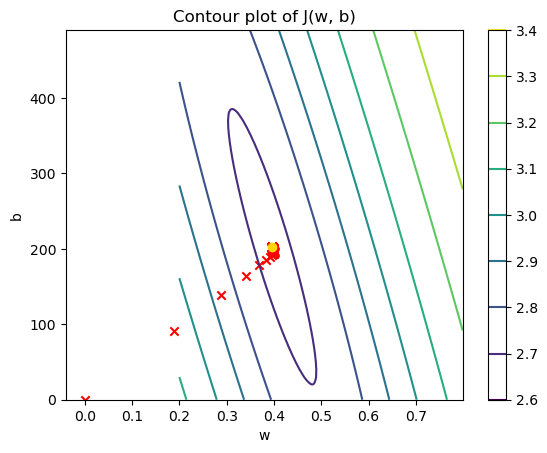

In [219]:
w_list = np.array([x/1000 for x in range(200,800)])
b_list = np.array([x for x in range(0,500,10)])
J_vals = np.array([[J(w, b) for w in w_list] for b in b_list])
logJ = np.log(J_vals)/np.log(50)
W, B = np.meshgrid(w_list, b_list)
plt.contour(W, B, logJ)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of J(w, b)')
plt.colorbar()

nb_list = []
nw_list = []
w,b = 0,0
alpha = 0.0000001
beta =  0.1

count = 200000
while(count):
    nw_list.append(w)
    nb_list.append(b)
    w_temp = w - alpha * ddw_J(w,b)
    b_temp = b - beta * ddb_J(w,b)
    if J(w_temp,b) >= J(w,b) and J(w,b_temp) >= J(w,b):
        break
    if not J(w_temp,b) >= J(w,b):
        w = w_temp
    if not J(w,b_temp) >= J(w,b):
        b = b_temp

    count -= 1

plt.scatter(nw_list, nb_list, c='r', marker='x')
plt.scatter(w, b, c='gold', marker='o')
print("Optimal value of w is : ", w)
print("Optimal value of b is : ", b)
plt.show()
# It takes a bit of time to execute because the dataset is big


#### Now Lets try out the optimal values of w and b in the model

Enter Size of House in Sq Ft:  1365


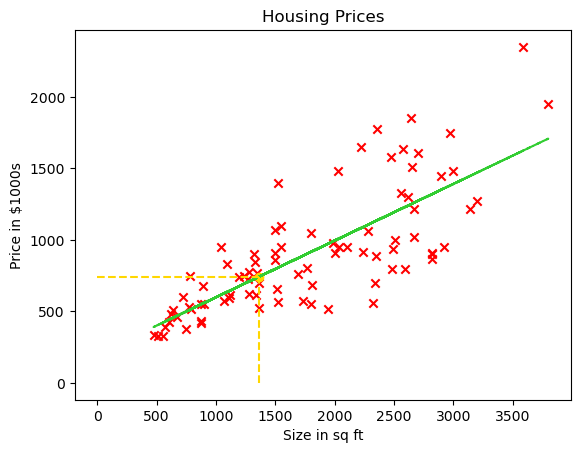

Optimal Price is :  743.7648432075033


In [221]:
inp_size = int(input("Enter Size of House in Sq Ft: "))
inp_size = [inp_size]
opt_f_list = np.array([x*w + b for x in sizeList]) # optimized values of w and b from previous shell
plt.scatter(sizeList, priceList, c='r', marker='x')
plt.title("Housing Prices")
plt.xlabel('Size in sq ft')
plt.ylabel('Price in $1000s')
plt.plot(sizeList, opt_f_list, linestyle="--", color="limegreen")
op_price = [inp_size[0]*w + b]
plt.vlines(inp_size,0,op_price, linestyle="--", color="gold")
plt.hlines(op_price,0,inp_size, linestyle="--", color="gold")
plt.scatter(inp_size, op_price, color="gold", marker = "o")
plt.show()
print("Optimal Price is : ", op_price[0])

##### With that, we have achieved the maximum possible accuracy for univariant linear regression model
Next time we will try increasing the number of variables to increase the accuracy of the model, we will also try out non linear model functions in regression models.